# Distribution Charts

## Setup

In [ ]:
# Install packages
install.packages("dplyr")
install.packages("ggplot2")
install.packages("tidyverse")
install.packages("Hmisc")
install.packages("gridExtra")

# Load packages
library(dplyr)
library(ggplot2)
library(tidyverse)
library(Hmisc)
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ─────────────────────────────────────

## CU

In [ ]:
# Initialize dataframes
cu = read.csv('https://media.githubusercontent.com/media/jofr1815/spikestats/main/data/matches/all_matches_CU.csv')

dim(cu)

sample = sample(nrow(cu), size=25)
cu_sample = cu[sample,] %>% select(ace, kill, stuffBlock, setErr, serveErr, attackErr, freeballErr, earnedPts, unforcedErrs)
cu_sample
write.csv(cu_sample, "sample.csv")

#cu = cu[!sample,]

cu$wonSet <- relevel(as.factor(cu$wonSet), ref="True")
# Detailed view
cu_detailed = cu %>% select(-unforcedErrs, -earnedPts, -setname, -wonMatch)
cu_earnedPts = cu %>%select(ace, kill, stuffBlock, wonSet) %>% pivot_longer(!wonSet, names_to = "Type", values_to = "Count")
cu_unforcedErrs = cu %>%select(setErr, serveErr, attackErr, freeballErr, wonSet) %>% pivot_longer(!wonSet, names_to = "Type", values_to = "Count")


cu_detailed_long = cu %>%select(-unforcedErrs, -earnedPts, -setname, -opponent, -wonMatch, -season, -teamName) %>% pivot_longer(!wonSet, names_to = "Type", values_to = "Count")
head(cu_detailed)
head(cu_detailed_long)

# Simple view
cu_simple = cu %>% select(wonSet, teamName, opponent, season, unforcedErrs, earnedPts)
head(cu_simple)

[1] 687  15

,ace,kill,stuffBlock,setErr,serveErr,attackErr,freeballErr,earnedPts,unforcedErrs
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
522,1,9,5,0,3,1,0,15,4
489,3,16,3,0,1,7,0,22,8
49,0,15,2,0,1,3,0,17,4
543,0,19,6,0,2,4,1,25,7
626,1,18,1,0,0,0,0,20,0
334,1,15,3,0,3,1,0,19,4
548,1,17,2,1,0,1,0,20,2
367,1,15,3,1,3,2,0,19,6
207,2,14,2,1,2,4,0,18,7


,teamName,opponent,season,wonSet,serveErr,setErr,attackErr,freeballErr,ace,kill,stuffBlock
,<chr>,<chr>,<chr>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,CU,NSULA,17,True,4,0,1,0,1,15,2
2,CU,NSULA,17,False,2,0,4,2,1,13,5
3,CU,NSULA,17,True,3,0,4,0,1,13,2
4,CU,NSULA,17,True,0,1,2,0,1,12,6
5,CU,CO St,17,False,6,0,2,0,0,16,1
6,CU,CO St,17,False,3,0,3,0,1,19,2


wonSet,Type,Count
<fct>,<chr>,<int>
True,serveErr,4
True,setErr,0
True,attackErr,1
True,freeballErr,0
True,ace,1
True,kill,15


,wonSet,teamName,opponent,season,unforcedErrs,earnedPts
,<fct>,<chr>,<chr>,<chr>,<int>,<int>
1,True,CU,NSULA,17,5,18
2,False,CU,NSULA,17,8,19
3,True,CU,NSULA,17,7,16
4,True,CU,NSULA,17,3,19
5,False,CU,CO St,17,8,17
6,False,CU,CO St,17,6,22


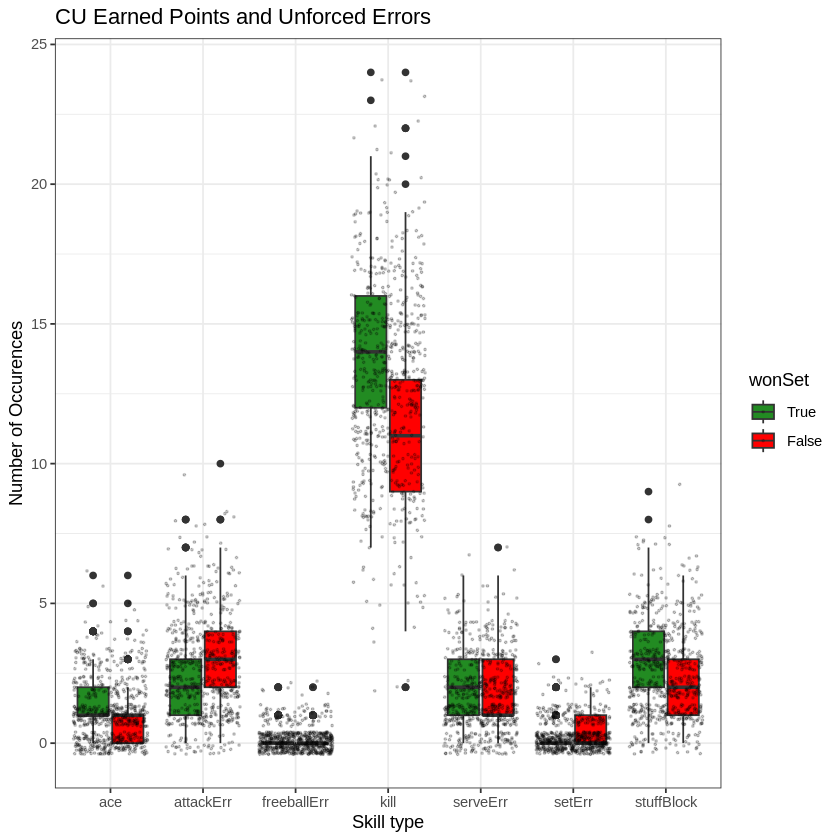

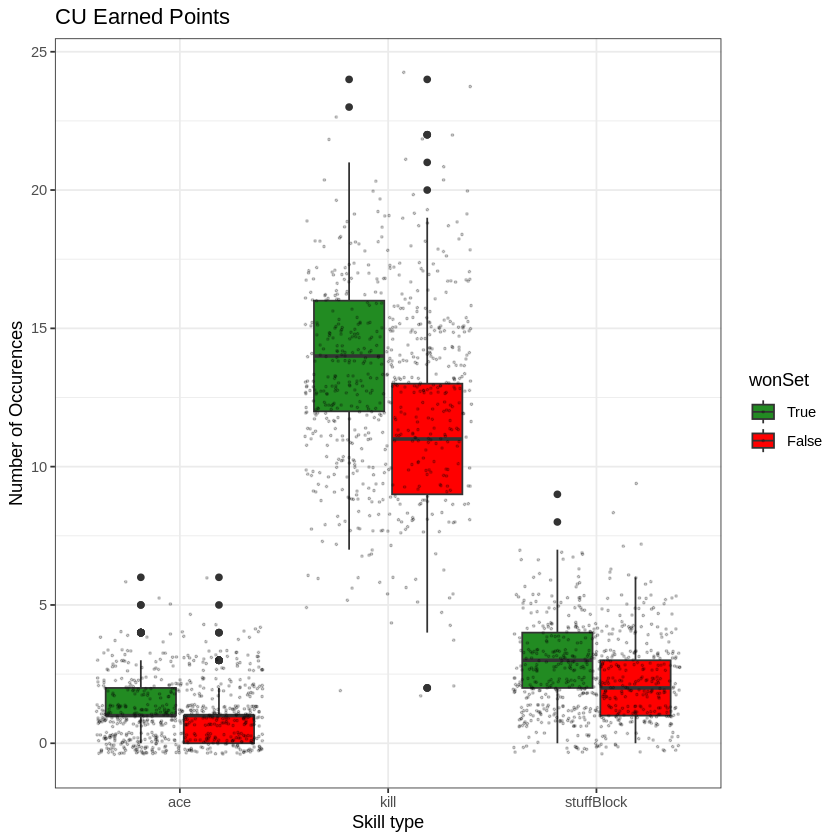

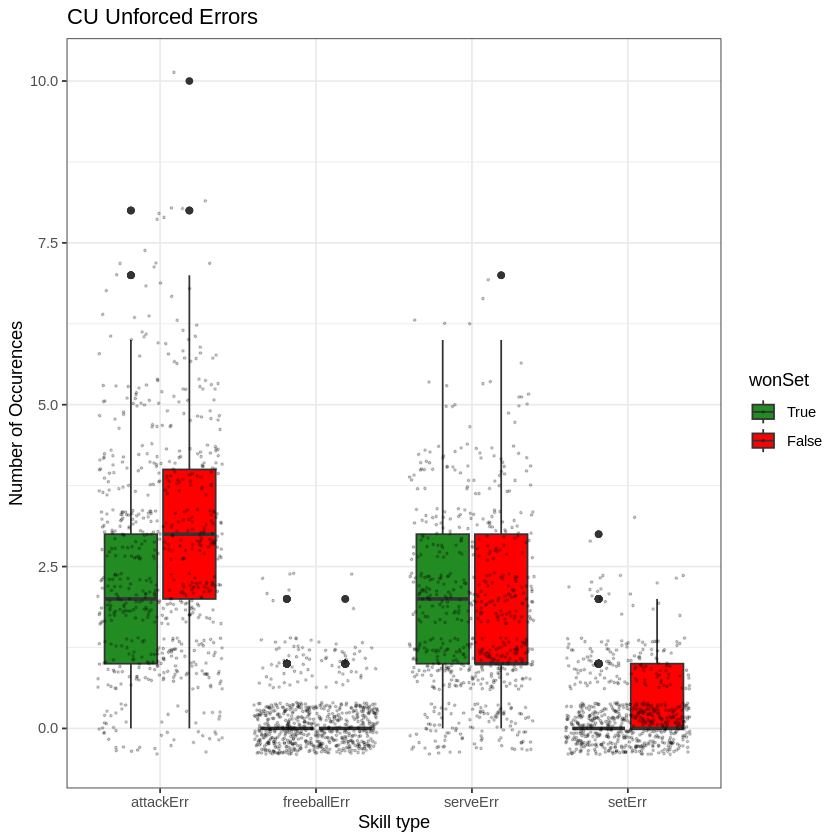

In [ ]:
# Box plots
ggplot(cu_detailed_long, aes(x = Type, y = Count, fill = wonSet)) +
  geom_boxplot() +
  geom_jitter(size = .4, alpha=.2) +
  theme_bw() + xlab("Skill type") +
  ylab("Number of Occurences") +
  ggtitle("CU Earned Points and Unforced Errors") +
  scale_fill_manual(values=c("forestgreen", "red"))

ggplot(cu_earnedPts, aes(x = Type, y = Count, fill = wonSet)) +
  geom_boxplot() +
  geom_jitter(size = .4, alpha=.2) +
  theme_bw() + xlab("Skill type") +
  ylab("Number of Occurences") +
  ggtitle("CU Earned Points") +
  scale_fill_manual(values=c("forestgreen", "red"))

ggplot(cu_unforcedErrs, aes(x = Type, y = Count, fill = wonSet)) +
  geom_boxplot() +
  geom_jitter(size = .4, alpha=.2) +
  theme_bw() + xlab("Skill type") +
  ylab("Number of Occurences") +
  ggtitle("CU Unforced Errors") +
  scale_fill_manual(values=c("forestgreen", "red"))


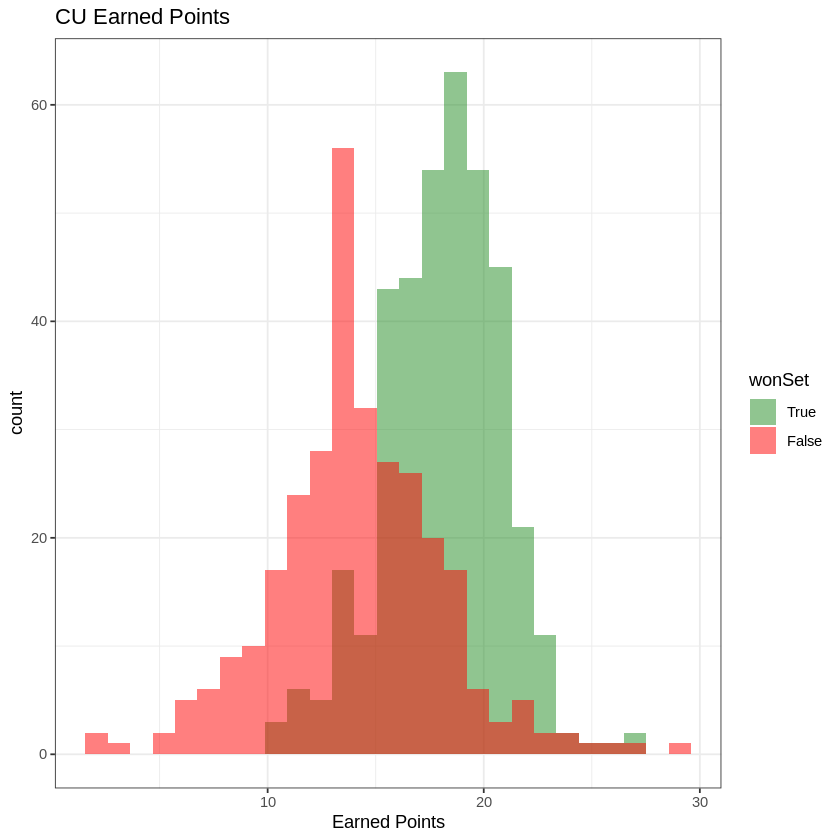

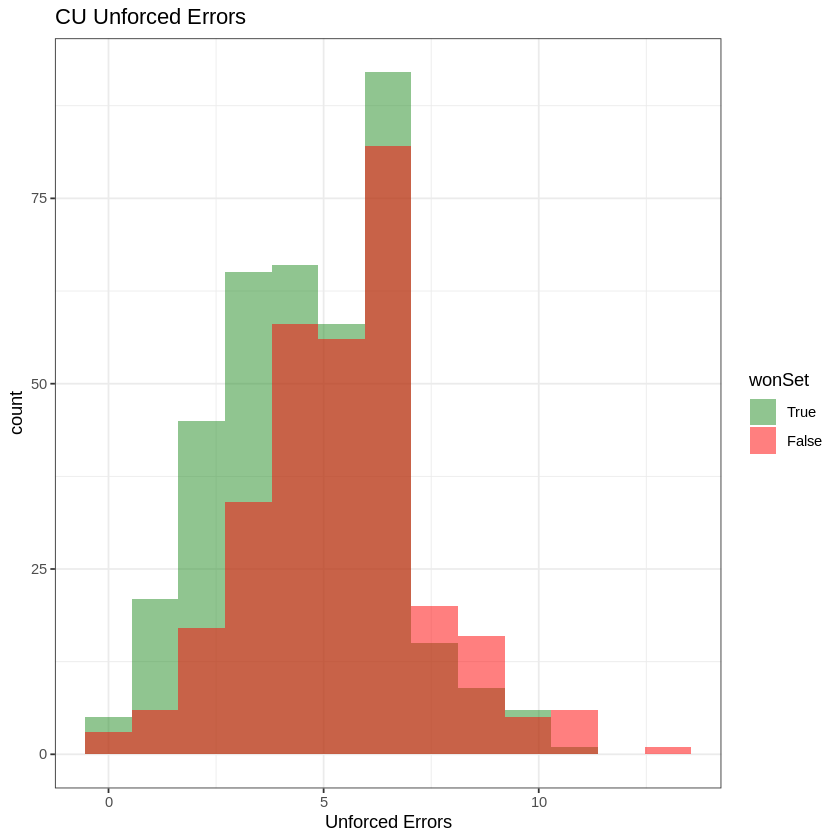

In [ ]:
# Histograms: Simple
ggplot(cu, aes(x=earnedPts, fill = wonSet)) + theme_bw() + geom_histogram(alpha=0.5, position="identity", bins=max(cu$earnedPts) - min(cu$earnedPts)) +
  xlab("Earned Points") +
  ggtitle("CU Earned Points") +
  scale_fill_manual(values=c("forestgreen", "red"))

cu$wonSet <- relevel(as.factor(cu$wonSet), ref="True")
ggplot(cu, aes(x=unforcedErrs, fill = wonSet)) + theme_bw() + geom_histogram(alpha=0.5, position="identity", bins = max(cu$unforcedErrs) - min(cu$unforcedErrs)) +
  xlab("Unforced Errors") +
  ggtitle("CU Unforced Errors") +
  scale_fill_manual(values=c("forestgreen", "red"))

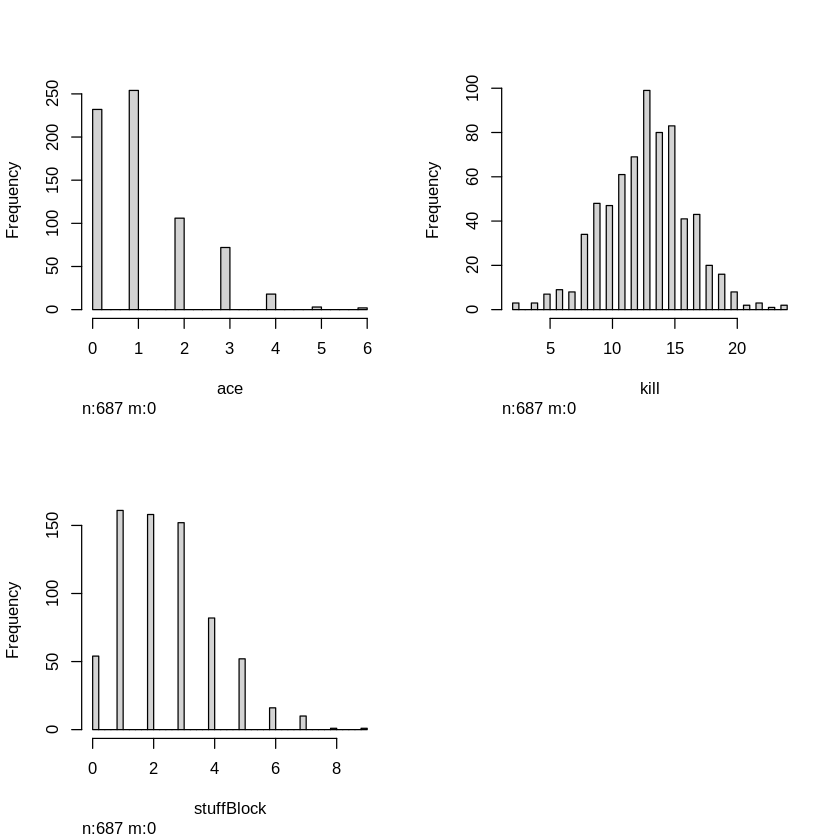

In [ ]:
# Detailed Histograms

# Function to pass in dataframe with wonSet and a var and plot the histogram
plot_hist = function(df){
  ggplot(df, aes(x = var, fill = wonSet)) + theme_bw() + geom_histogram(alpha=0.5, position="identity", bins = max(df$var) - min(df$var))
}



cu %>%select(ace, kill, stuffBlock) %>% hist.data.frame()

## Opponents

In [ ]:
# Initialize dataframes
opp = read.csv('https://media.githubusercontent.com/media/jofr1815/spikestats/main/data/matches/all_matches_opp.csv')
opp$wonSet <- relevel(as.factor(opp$wonSet), ref="True")

# Detailed view
opp_detailed = opp %>% select(-unforcedErrs, -earnedPts, -setname, -wonMatch)
opp_earnedPts = opp %>%select(ace, kill, stuffBlock, wonSet) %>% pivot_longer(!wonSet, names_to = "Type", values_to = "Count")
opp_unforcedErrs = opp %>%select(setErr, serveErr, attackErr, freeballErr, wonSet) %>% pivot_longer(!wonSet, names_to = "Type", values_to = "Count")


opp_detailed_long = opp %>%select(-unforcedErrs, -earnedPts, -setname, -opponent, -wonMatch, -season, -teamName) %>% pivot_longer(!wonSet, names_to = "Type", values_to = "Count")
head(opp_detailed)
head(opp_detailed_long)

# Simple view
opp_simple = opp %>% select(wonSet, teamName, opponent, season, unforcedErrs, earnedPts)
head(opp_simple)

,teamName,opponent,season,wonSet,serveErr,setErr,attackErr,freeballErr,ace,kill,stuffBlock
,<chr>,<chr>,<chr>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NSULA,CU,17,False,0,0,6,1,1,8,0
2,NSULA,CU,17,True,1,2,4,0,0,16,4
3,NSULA,CU,17,False,4,0,5,0,2,8,0
4,NSULA,CU,17,False,3,0,3,0,1,11,0
5,CO St,CU,17,True,0,0,4,0,3,12,2
6,CO St,CU,17,True,1,0,0,0,3,13,3


wonSet,Type,Count
<fct>,<chr>,<int>
False,serveErr,0
False,setErr,0
False,attackErr,6
False,freeballErr,1
False,ace,1
False,kill,8


,wonSet,teamName,opponent,season,unforcedErrs,earnedPts
,<fct>,<chr>,<chr>,<chr>,<int>,<int>
1,False,NSULA,CU,17,7,9
2,True,NSULA,CU,17,7,20
3,False,NSULA,CU,17,9,10
4,False,NSULA,CU,17,6,12
5,True,CO St,CU,17,4,17
6,True,CO St,CU,17,1,19


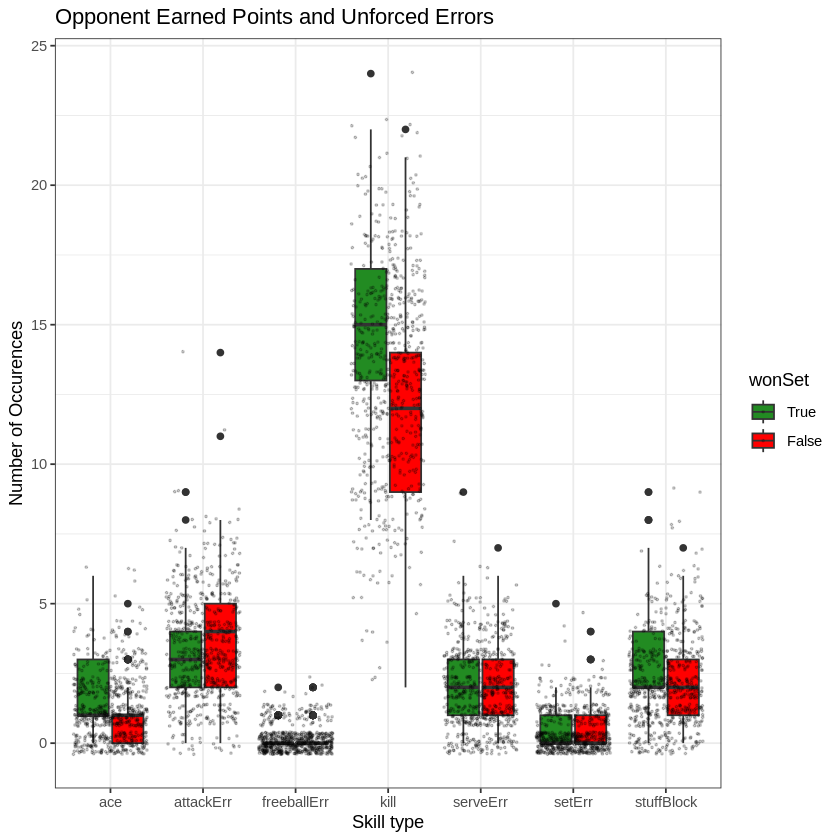

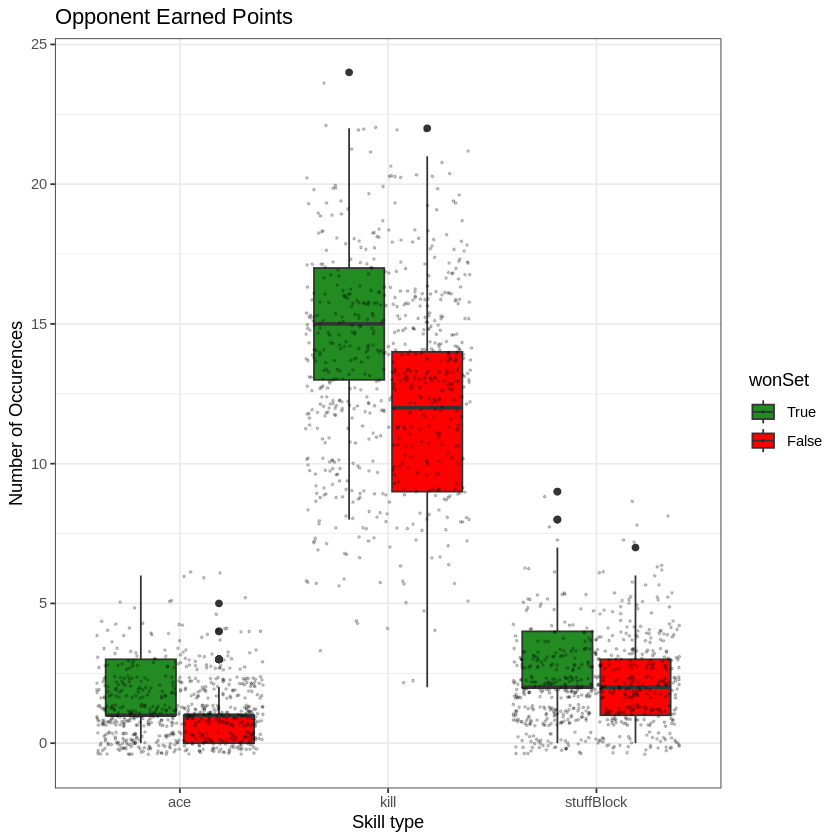

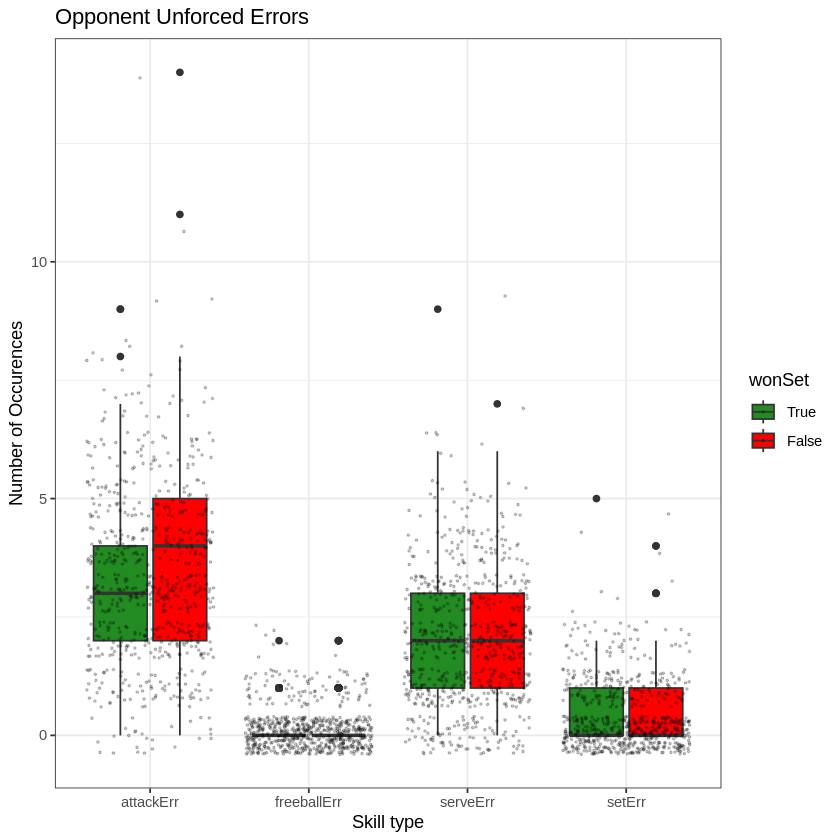

In [ ]:
# Box plots
ggplot(opp_detailed_long, aes(x = Type, y = Count, fill = wonSet)) +
  geom_boxplot() +
  geom_jitter(size = .4, alpha=.2) +
  theme_bw() + xlab("Skill type") +
  ylab("Number of Occurences") +
  ggtitle("Opponent Earned Points and Unforced Errors") +
  scale_fill_manual(values=c("forestgreen", "red"))

ggplot(opp_earnedPts, aes(x = Type, y = Count, fill = wonSet)) +
  geom_boxplot() +
  geom_jitter(size = .4, alpha=.2) +
  theme_bw() + xlab("Skill type") +
  ylab("Number of Occurences") +
  ggtitle("Opponent Earned Points") +
  scale_fill_manual(values=c("forestgreen", "red"))

ggplot(opp_unforcedErrs, aes(x = Type, y = Count, fill = wonSet)) +
  geom_boxplot() +
  geom_jitter(size = .4, alpha=.2) +
  theme_bw() + xlab("Skill type") +
  ylab("Number of Occurences") +
  ggtitle("Opponent Unforced Errors") +
  scale_fill_manual(values=c("forestgreen", "red"))


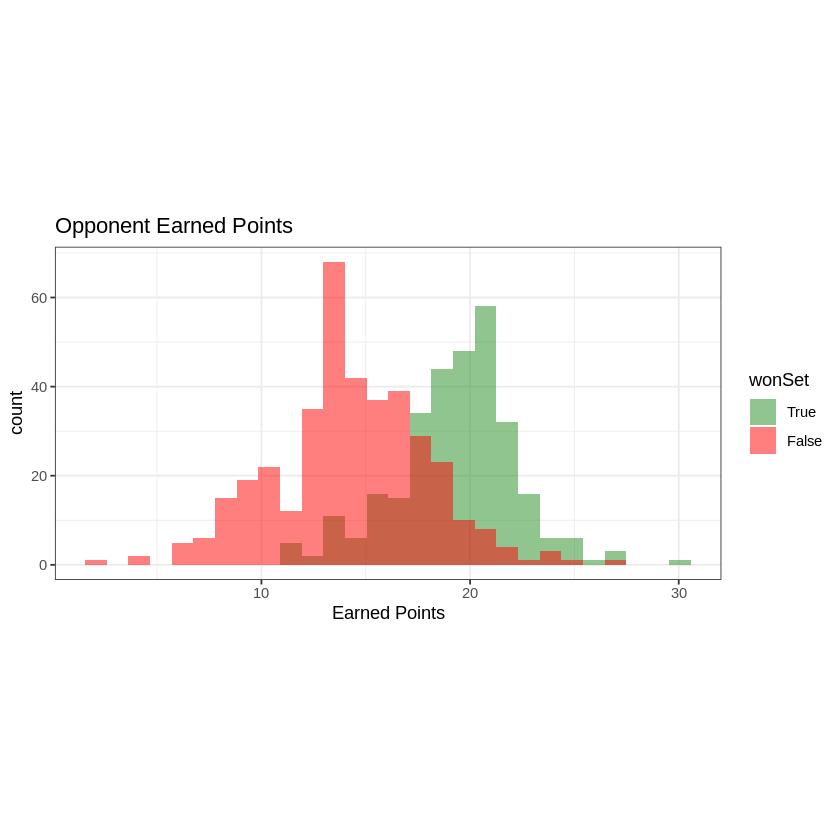

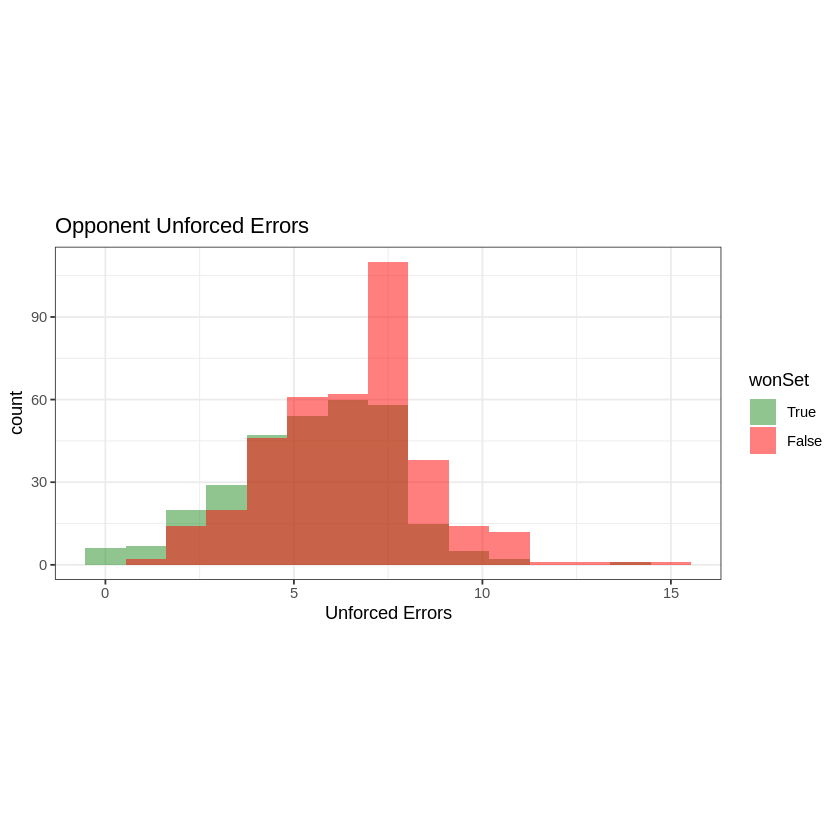

In [ ]:
# Histograms: Simple
ggplot(opp, aes(x=earnedPts, fill = wonSet)) + theme_bw() + geom_histogram(alpha=0.5, position="identity", bins=max(opp$earnedPts) - min(opp$earnedPts)) +
  xlab("Earned Points") +
  ggtitle("Opponent Earned Points") +
  scale_fill_manual(values=c("forestgreen", "red")) +
  theme(aspect.ratio = 1/2)

opp$wonSet <- relevel(as.factor(opp$wonSet), ref="True")
ggplot(opp, aes(x=unforcedErrs, fill = wonSet)) + theme_bw() + geom_histogram(alpha=0.5, position="identity", bins = max(opp$unforcedErrs) - min(opp$unforcedErrs)) +
  xlab("Unforced Errors") +
  ggtitle("Opponent Unforced Errors") +
  scale_fill_manual(values=c("forestgreen", "red")) +
  theme(aspect.ratio = 1/2)


In [ ]:
# Fit CU and OPP base models
cu$wonSet <- relevel(as.factor(cu$wonSet), ref="False")
cu_base = glm(wonSet ~ unforcedErrs + earnedPts, cu, family="binomial")
summary(cu_base)

opp$wonSet <- relevel(as.factor(cu$wonSet), ref="False")
opp_base = glm(wonSet ~ unforcedErrs + earnedPts, opp, family="binomial")
summary(opp_base)

# Extract coefficients and standard errors for both models
coef_model1 <- abs(coef(cu_base))
se_model1 <- sqrt(diag(vcov(cu_base)))
coef_model2 <- abs(coef(opp_base))
se_model2 <- sqrt(diag(vcov(opp_base)))

# Confidence level (e.g., 95%)
confidence_level <- 0.90
# Compute the multiplier for the confidence interval based on the desired confidence level
z_value <- qnorm((1 + confidence_level) / 2)  # For a 95% confidence interval (assuming normal distribution)

# Calculate confidence intervals for each coefficient
ci_model1_lower <- coef_model1 - z_value * se_model1
ci_model1_upper <- coef_model1 + z_value * se_model1
ci_model2_lower <- coef_model2 - z_value * se_model2
ci_model2_upper <- coef_model2 + z_value * se_model2






Call:
glm(formula = wonSet ~ unforcedErrs + earnedPts, family = "binomial", 
    data = cu)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -4.85417    0.53197  -9.125  < 2e-16 ***
unforcedErrs -0.26372    0.04481  -5.886 3.96e-09 ***
earnedPts     0.38702    0.03219  12.025  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 943.28  on 686  degrees of freedom
Residual deviance: 687.19  on 684  degrees of freedom
AIC: 693.19

Number of Fisher Scoring iterations: 5



Call:
glm(formula = wonSet ~ unforcedErrs + earnedPts, family = "binomial", 
    data = opp)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   6.77797    0.67042   10.11  < 2e-16 ***
unforcedErrs  0.27319    0.04870    5.61 2.03e-08 ***
earnedPts    -0.47140    0.03719  -12.68  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 943.28  on 686  degrees of freedom
Residual deviance: 596.30  on 684  degrees of freedom
AIC: 602.3

Number of Fisher Scoring iterations: 5


,Model,Variable,Coefficient_Mean,Coefficient_Std_Error,CI_Lower,CI_Upper
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Model 1,(Intercept),4.8541663,0.53197254,3.9791493,5.7291833
2,Model 1,unforcedErrs,0.2637237,0.04480515,0.1900258,0.3374216
3,Model 1,earnedPts,0.3870151,0.03218532,0.3340750,0.4399553
4,Model 2,(Intercept),6.7779657,0.67042414,5.6752161,7.8807153
5,Model 2,unforcedErrs,0.2731895,0.04869860,0.1930875,0.3532916
6,Model 2,earnedPts,0.4713992,0.03718688,0.4102322,0.5325662


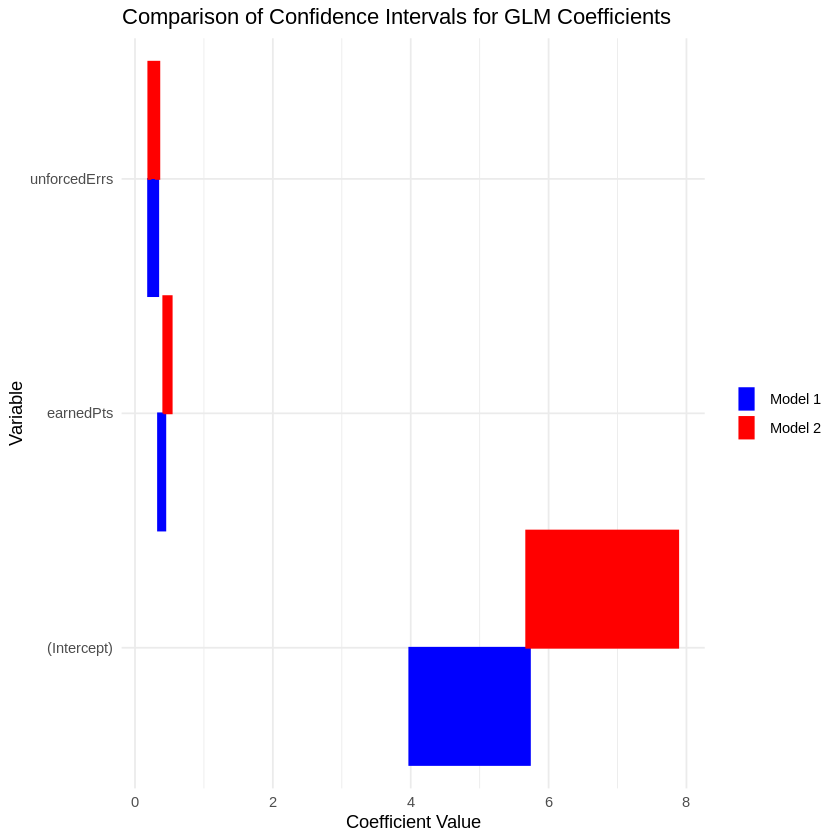

In [ ]:
library(ggplot2)

# Create a data frame to store coefficient information
coefficient_data <- data.frame(
  Model = rep(c("Model 1", "Model 2"), each = length(coef_model1)),
  Variable = rep(names(coef_model1), times = 2),
  Coefficient_Mean = c(coef_model1, coef_model2),
  Coefficient_Std_Error = c(se_model1, se_model2),
  CI_Lower = c(ci_model1_lower, ci_model2_lower),
  CI_Upper = c(ci_model1_upper, ci_model2_upper)
)

# Define dodge width for better visualization
dodge_width <- 1

# Plot using ggplot2
ggplot(coefficient_data, aes(x = Coefficient_Mean, y = Variable, color = Model, fill = Model)) +
  geom_crossbar(aes(xmin = CI_Lower, xmax = CI_Upper), position = position_dodge(width = dodge_width), width = dodge_width, fatten = 2) +
  theme_minimal() +
  labs(x = "Coefficient Value", y = "Variable", title = "Comparison of Confidence Intervals for GLM Coefficients") +
  scale_color_manual(values = c("blue", "red")) +
  scale_fill_manual(values = c("blue", "red")) +
  theme(legend.title = element_blank())

head(coefficient_data)


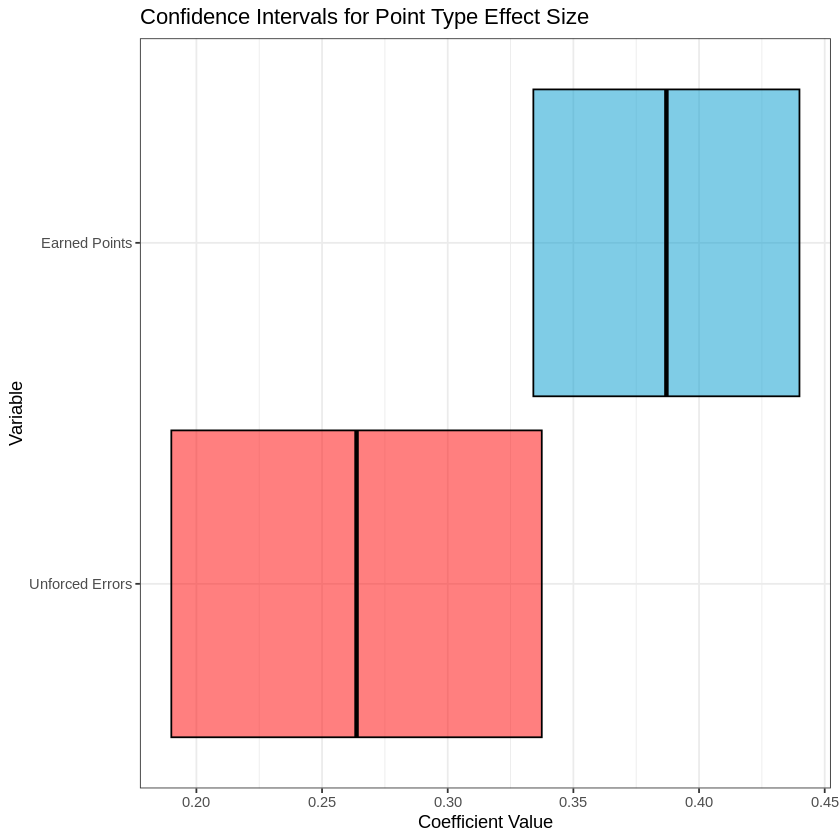

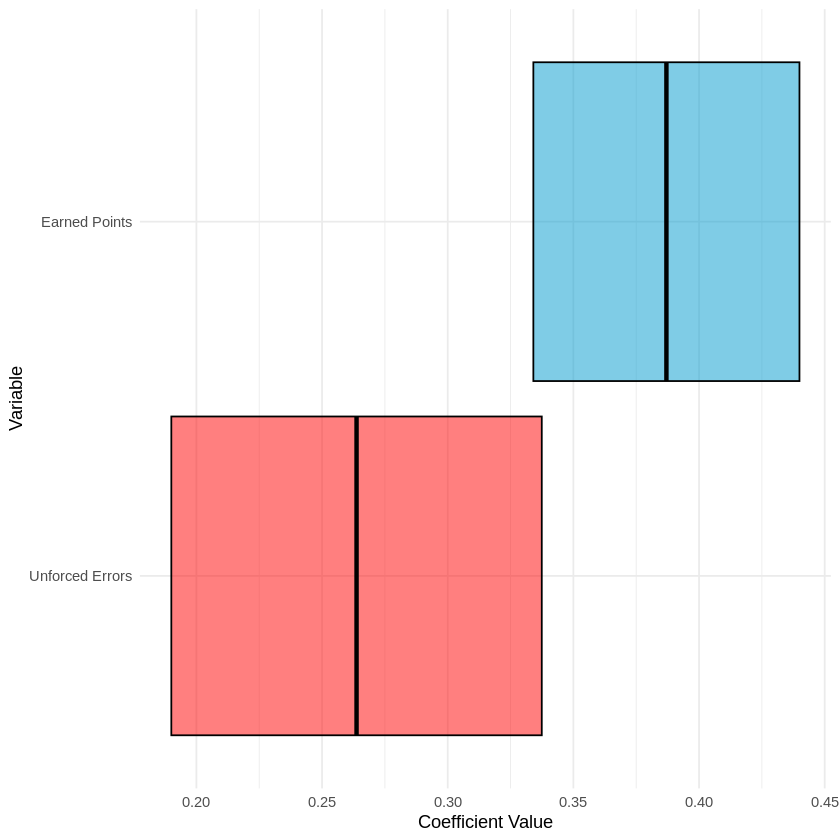

In [ ]:
# Create a data frame to store coefficient information
coef_data <- data.frame(
  Variable = names(coef_model1),
  Coefficient_Magnitude = coef_model1,
  Coefficient_Std_Error = se_model1,
  CI_Lower = ci_model1_lower,
  CI_Upper = ci_model1_upper
)
coef_data = coef_data[coef_data$Variable != "(Intercept)", ]
coef_data$Variable <- relevel(as.factor(coef_data$Variable), ref="earnedPts")
coef_data <- coef_data %>%
  mutate(Variable = ifelse(Variable == "unforcedErrs", "Unforced Errors",
                             ifelse(Variable == "earnedPts", "Earned Points", Variable)))


  # Plot using ggplot2
ggplot(coef_data, aes(x = Coefficient_Magnitude, y = reorder(Variable, Coefficient_Magnitude))) +
  geom_crossbar(aes(xmin = CI_Lower, xmax = CI_Upper, fill = Variable), alpha = 0.5, show.legend = FALSE) +
  theme_bw() +
  labs(x = "Coefficient Value", y = "Variable", title = "Confidence Intervals for Point Type Effect Size") +
  theme(legend.title = element_blank()) +
  scale_fill_manual(values=c("deepskyblue3", "red"))

ggplot(coef_data, aes(x = Coefficient_Magnitude, y = reorder(Variable, Coefficient_Magnitude))) +
  geom_crossbar(aes(xmin = CI_Lower, xmax = CI_Upper, fill = Variable), alpha = 0.5, show.legend = FALSE) +
  labs(x = "Coefficient Value", y = "Variable") +
  theme_minimal() +
  scale_fill_manual(values = c("deepskyblue3", "red"))




Call:
glm(formula = wonSet ~ serveErr + setErr + attackErr + freeballErr + 
    ace + kill + stuffBlock, family = "binomial", data = cu)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.74599    0.53910  -8.803  < 2e-16 ***
serveErr    -0.17999    0.07197  -2.501   0.0124 *  
setErr      -0.07121    0.17796  -0.400   0.6891    
attackErr   -0.31957    0.05931  -5.388 7.12e-08 ***
freeballErr -0.26115    0.25697  -1.016   0.3095    
ace          0.58156    0.09181   6.334 2.39e-10 ***
kill         0.34014    0.03561   9.552  < 2e-16 ***
stuffBlock   0.48018    0.06544   7.338 2.16e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 943.28  on 686  degrees of freedom
Residual deviance: 672.50  on 679  degrees of freedom
AIC: 688.5

Number of Fisher Scoring iterations: 5



Call:
glm(formula = wonSet ~ serveErr + setErr + attackErr + freeballErr + 
    ace + kill + stuffBlock, family = "binomial", data = opp)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  6.46377    0.68390   9.451  < 2e-16 ***
serveErr     0.24568    0.07399   3.320 0.000899 ***
setErr       0.23758    0.15059   1.578 0.114632    
attackErr    0.29532    0.06405   4.610 4.02e-06 ***
freeballErr  0.58015    0.29269   1.982 0.047468 *  
ace         -0.69642    0.09538  -7.302 2.84e-13 ***
kill        -0.41646    0.04062 -10.252  < 2e-16 ***
stuffBlock  -0.55175    0.07264  -7.595 3.07e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 943.28  on 686  degrees of freedom
Residual deviance: 584.00  on 679  degrees of freedom
AIC: 600

Number of Fisher Scoring iterations: 5


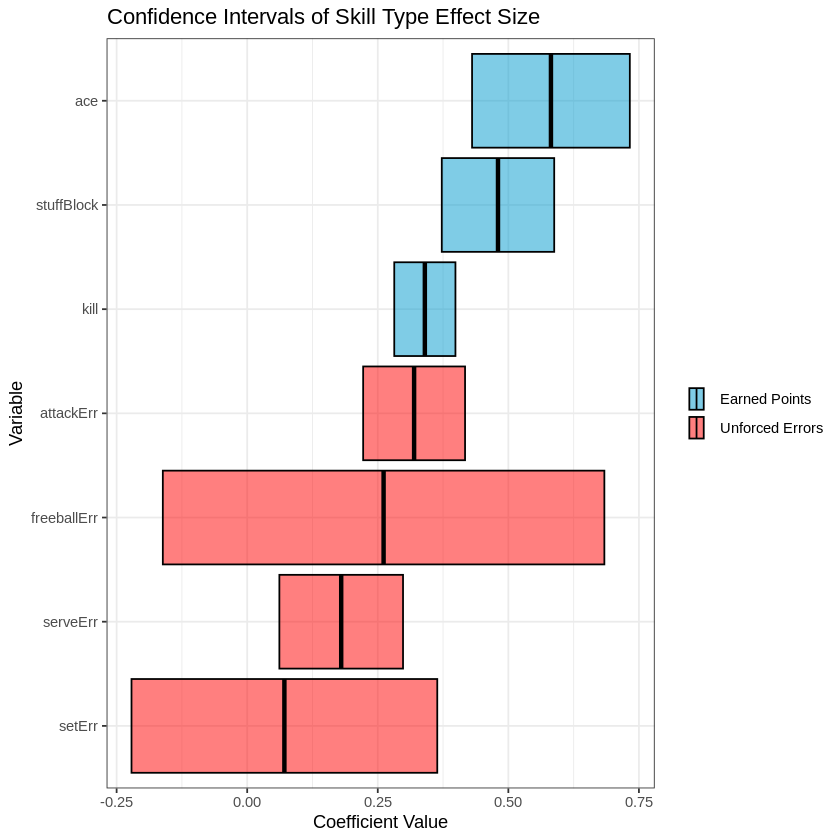

In [ ]:
cu_all = glm(wonSet ~ serveErr + setErr + attackErr + freeballErr + ace + kill + stuffBlock, cu, family="binomial")
opp_all = glm(wonSet ~ serveErr + setErr + attackErr + freeballErr + ace + kill + stuffBlock, opp, family="binomial")
summary(cu_all)
summary(opp_all)

# Extract coefficients and standard errors for both models
coef_model3 <- abs(coef(cu_all))
se_model3 <- sqrt(diag(vcov(cu_all)))
coef_model4 <- abs(coef(opp_all))
se_model4 <- sqrt(diag(vcov(opp_all)))

# Confidence level (e.g., 95%)
confidence_level <- 0.90
# Compute the multiplier for the confidence interval based on the desired confidence level
z_value <- qnorm((1 + confidence_level) / 2)  # For a 95% confidence interval (assuming normal distribution)

# Calculate confidence intervals for each coefficient
ci_model3_lower <- coef_model3 - z_value * se_model3
ci_model3_upper <- coef_model3 + z_value * se_model3
ci_model4_lower <- coef_model4 - z_value * se_model4
ci_model4_upper <- coef_model4 + z_value * se_model4


# Create a data frame to store coefficient information
coef_data <- data.frame(
  Variable = names(coef_model3),
  Coefficient_Magnitude = coef_model3,
  Coefficient_Std_Error = se_model3,
  CI_Lower = ci_model3_lower,
  CI_Upper = ci_model3_upper
)

coef_data <- coef_data[order(coef_data$Coefficient_Magnitude, decreasing = TRUE), ]
coef_data = coef_data[coef_data$Variable != "(Intercept)", ]
coef_data <- coef_data %>%
  mutate(skillType = ifelse(Variable %in% c("ace", "kill", "stuffBlock"), "Earned Points", "Unforced Errors"))

  # Plot using ggplot2
ggplot(coef_data, aes(x = Coefficient_Magnitude, y = reorder(Variable, Coefficient_Magnitude))) +
  geom_crossbar(aes(xmin = CI_Lower, xmax = CI_Upper, fill = skillType), alpha = 0.5) +
  theme_bw() +
  labs(x = "Coefficient Value", y = "Variable", title = "Confidence Intervals of Skill Type Effect Size") +
  theme(legend.title = element_blank()) +
  scale_fill_manual(values=c("deepskyblue3", "red"))


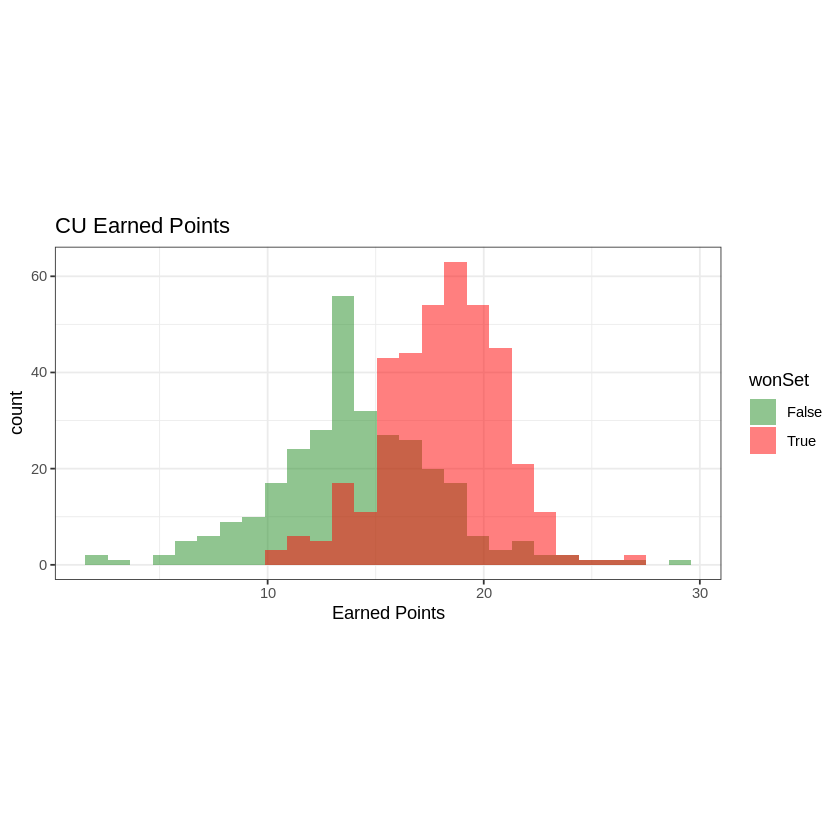

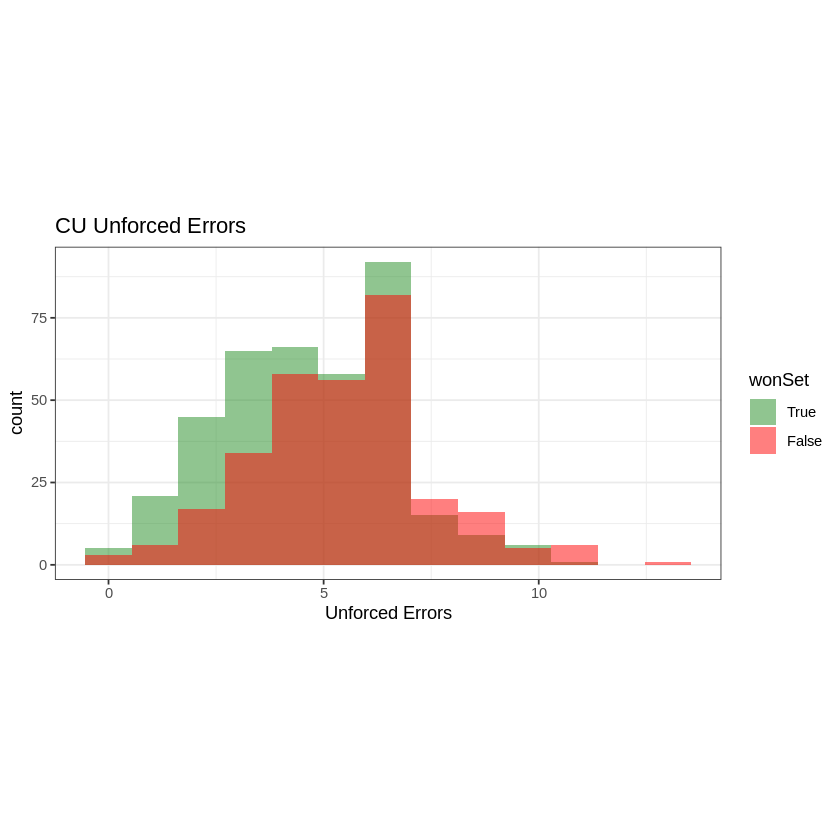

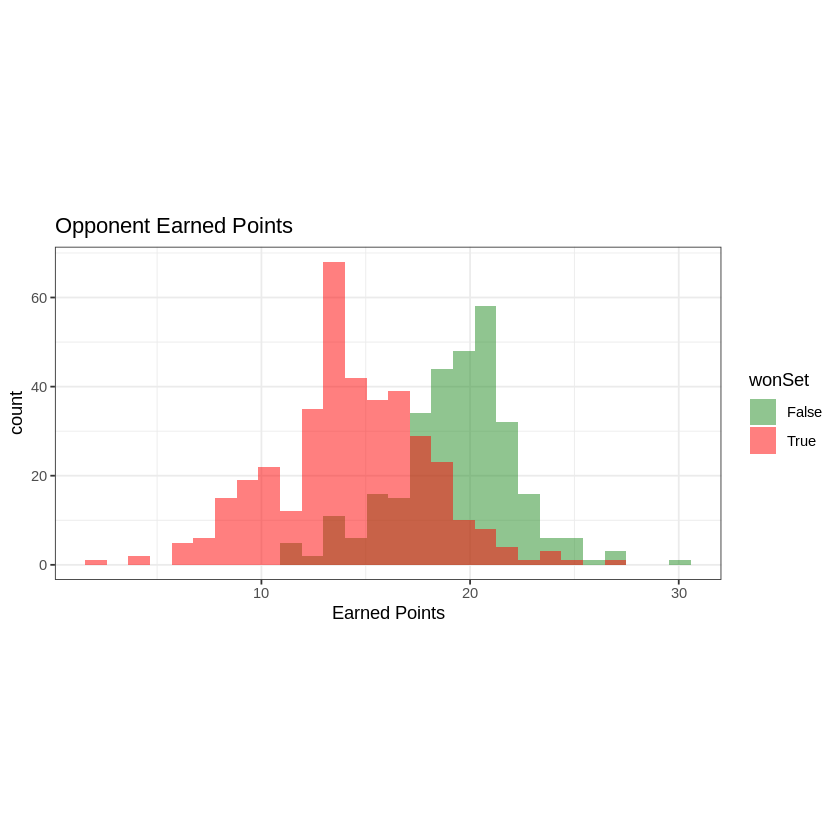

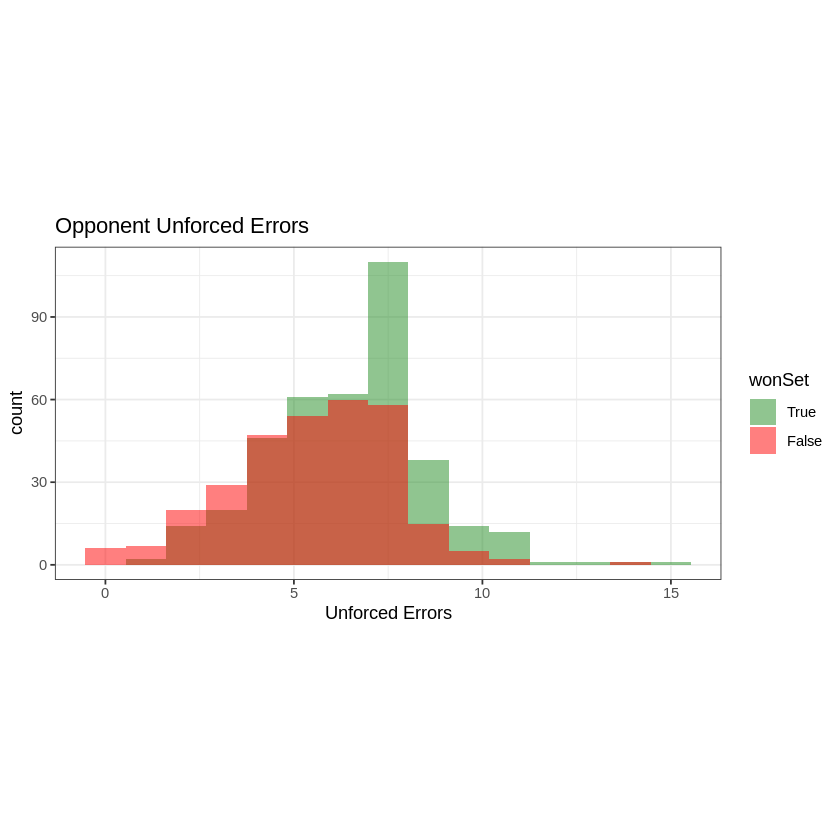

In [ ]:
# Histograms: Simple
ggplot(cu, aes(x=earnedPts, fill = wonSet)) + theme_bw() + geom_histogram(alpha=0.5, position="identity", bins=max(cu$earnedPts) - min(cu$earnedPts)) +
  xlab("Earned Points") +
  ggtitle("CU Earned Points") +
  scale_fill_manual(values=c("forestgreen", "red")) +
  theme(aspect.ratio = 1/2)

cu$wonSet <- relevel(as.factor(cu$wonSet), ref="True")
ggplot(cu, aes(x=unforcedErrs, fill = wonSet)) + theme_bw() + geom_histogram(alpha=0.5, position="identity", bins = max(cu$unforcedErrs) - min(cu$unforcedErrs)) +
  xlab("Unforced Errors") +
  ggtitle("CU Unforced Errors") +
  scale_fill_manual(values=c("forestgreen", "red")) +
  theme(aspect.ratio = 1/2)


ggplot(opp, aes(x=earnedPts, fill = wonSet)) + theme_bw() + geom_histogram(alpha=0.5, position="identity", bins=max(opp$earnedPts) - min(opp$earnedPts)) +
  xlab("Earned Points") +
  ggtitle("Opponent Earned Points") +
  scale_fill_manual(values=c("forestgreen", "red")) +
  theme(aspect.ratio = 1/2)

opp$wonSet <- relevel(as.factor(opp$wonSet), ref="True")
ggplot(opp, aes(x=unforcedErrs, fill = wonSet)) + theme_bw() + geom_histogram(alpha=0.5, position="identity", bins = max(opp$unforcedErrs) - min(opp$unforcedErrs)) +
  xlab("Unforced Errors") +
  ggtitle("Opponent Unforced Errors") +
  scale_fill_manual(values=c("forestgreen", "red")) +
  theme(aspect.ratio = 1/2)

